# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [69]:
# stundent details example: John S. 9812
#                       student details 1: Yuri M 4578
# (if exists)           student details 2: 
# (if exists)           student details 3: 
# (if exists&premitted) student details 4: 

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>  

###########################################
A quick summary of what I've used GPT for
    -Trying to see if sklearn supports GPU(unneccesary since the train set is small, but still)
    -making and plotting all the graphs
    -Automating k fold cross validation using sklearn's gridsearchCV
###########################################

AI agent name: ChatGPT o4
Goal: Removing output cells made in jupyter
Propmpt1: 
    How to remove all of my output cells in a jupyter notebook, when using vscode


AI agent name: ChatGPT o4
Goal: Visualizing stuff using pyplot and seaborn
Propmpt1:
    How to create a heatmap using seaborn/pylot explain each param
Propmpt2:
    Explain each line and it's parameters in your code in depth


AI agent name: ChatGPT o4
Goal: Seeing if i can use CUDA or run on GPU using sklearn
Propmpt1:
    Can I run sklearn model training on GPU using cuda or something similar
Propmpt2:
    So sklearn is cpu bound? I can't just use .to() like I use in pytorch?


AI agent name: ChatGPT o4
Goal: Creating a bar plot, used to see class seperation
Propmpt1:
    I need to create a 3 bar plot using seaborn, show how to do that, explain each step
Propmpt2:
    Explain each line of your code


AI agent name: ChatGPT o4
Goal: Creating a correlation heat map, to determine correlation between features
Propmpt1:
    I need to create a pearson correlation heat map using seaborn, how do i make one, i want it to have color grading red being highly correlated
Propmpt2:
    Explain what each line means, and explain the parameters


AI agent name: ChatGPT o4
Goal: Creating pca scatterplots
Propmpt1:
    How do I create a pca scatter plot
Propmpt1:
    Help me graph a PCA scatter plot, I expect the X axis to be PC1, y axis to be PC2. I want to see what % next to each one.
Propmpt3:
    How to create a variance bar plot so I can see the variance
Propmpt4: 
    this is my code, create one for me
Propmpt5:
    Have it show what % above each bar, also add a variance % general line


AI agent name: ChatGPT o4
Goal: Creating an IQR box plot to spot outliers
Propmpt1:
    create a box plot with IQR calculation per feature, have it also show and print how many outliers per feature


AI agent name: ChatGPT o4
Goal: Creating 5 fold cross validation
Propmpt1:
    Does sklearn have an automatic way to do k fold cross validation
Propmpt2:
    Explain gridsearchcv and it's params
Propmpt3:
    Can i somehow pass more than one model? for example if i want to try which model would work best?
Propmpt4:
    Explain how pipeline works, what it's params
Propmpt5:
    Build an example of how I implement GridsearchCV using a pipeline and param grid for all my different classifiers, use logistic regression and KNN as an example. in the param grid, in the pipeline use PCA and as for the classifier show me how I can use multiple types in a single pipeline.
Propmpt6:
    Does pytorch have something similar to gridsearchCV? show me examples and explain
Propmpt7:
    Show an example for SVM, RandomTree, NaiveBayes. I care to see how you implement their hyper params, explain every line
    

AI agent name: ChatGPT o4
Goal: fixing df display
Propmpt1:
    My pandas df's column width isn't enough, i have text cut off after using display(). how to fix


Other assistanse: 
    StatQuest YouTube channel   -    to learn about the different classifiers
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>




    
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [ ]:
# IMPORTS
# main libraries
import sklearn
import pandas as pd
import seaborn as sns 
import numpy  as np
import matplotlib.pyplot as plt

from IPython.display import display     # to improve df prints

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# kfold cross validation
from sklearn.pipeline import Pipeline   # Allows you to sequentially apply a list of transformers to preprocess the data
from sklearn.model_selection import GridSearchCV    
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


In [ ]:
# HyperParams
RANDOM = 2025
SCALER = StandardScaler()

In [72]:
train = pd.read_csv("wine_train.csv")
test  = pd.read_csv("wine_test.csv")

# Prints the first 5 rows of each dataset
print(f"First 5 rows of wine_train:\nIt has {train.shape[1]} columns in totatl, one of which is the classification label \'raget\'")
display(train.head(5))
print(f"\nFirst 5 rows of wine_test:\nIt has {train.shape[1]} columns in totatl, one of which is the classification label \'raget\'")
display(test.head(5))

# Split each dataset to data and labels
train_data = train.drop('target', axis=1)
train_labels = train['target']
test_data = test.drop('target', axis=1)
test_labels = test['target']

First 5 rows of wine_train:
It has 14 columns in totatl, one of which is the classification label 'raget'


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2



First 5 rows of wine_test:
It has 14 columns in totatl, one of which is the classification label 'raget'


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


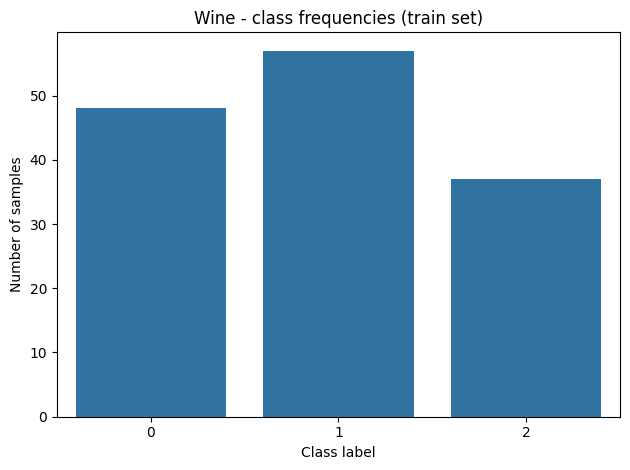

In [73]:
##########################################################################################
# Bar Chart
##########################################################################################

"""
Bar chart for class distribution
I use it to see whether classes are well balanced
"""
class_counts = train_labels.value_counts().sort_index()
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Wine - class frequencies (train set)")
plt.xlabel("Class label")
plt.ylabel("Number of samples")
plt.tight_layout()
plt.show()

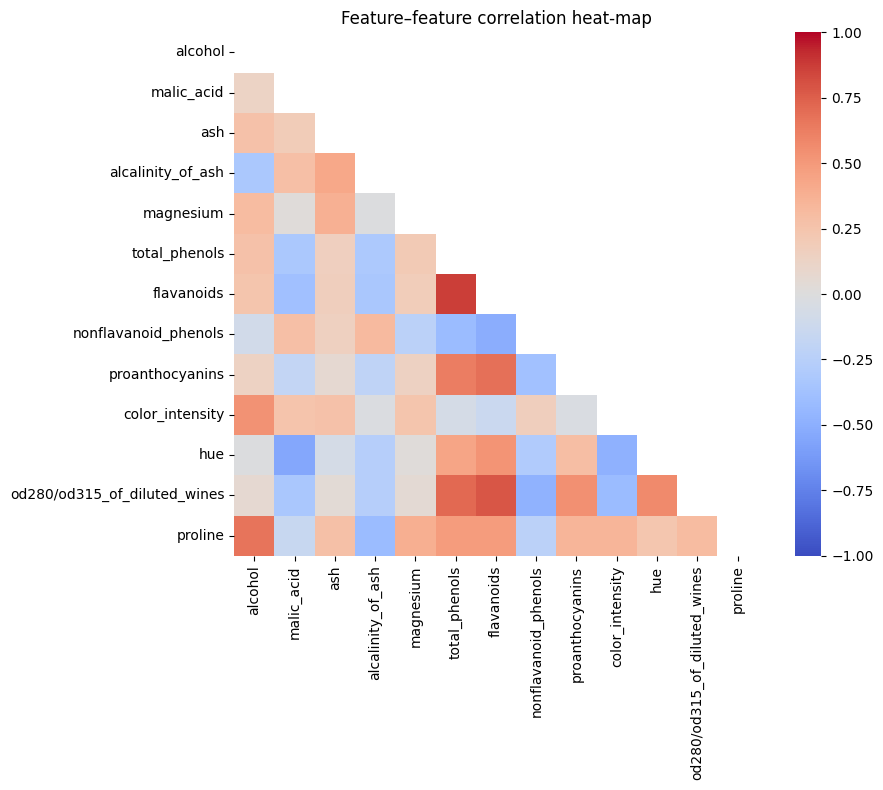

In [74]:
##########################################################################################
# Pearson correlation heat map
##########################################################################################
"""
helps spot highly correlated pairs of features
will use PCA or regularisation if the value is greater than 0.75 or 0.8...
could drop/combine features 

total_phenols and flavanoids are highly correlated
"""
corr = train_data.corr()    
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap="coolwarm", vmin=-1, vmax=1, square=True)
plt.title("Feature–feature correlation heat-map")
plt.tight_layout()
plt.show()

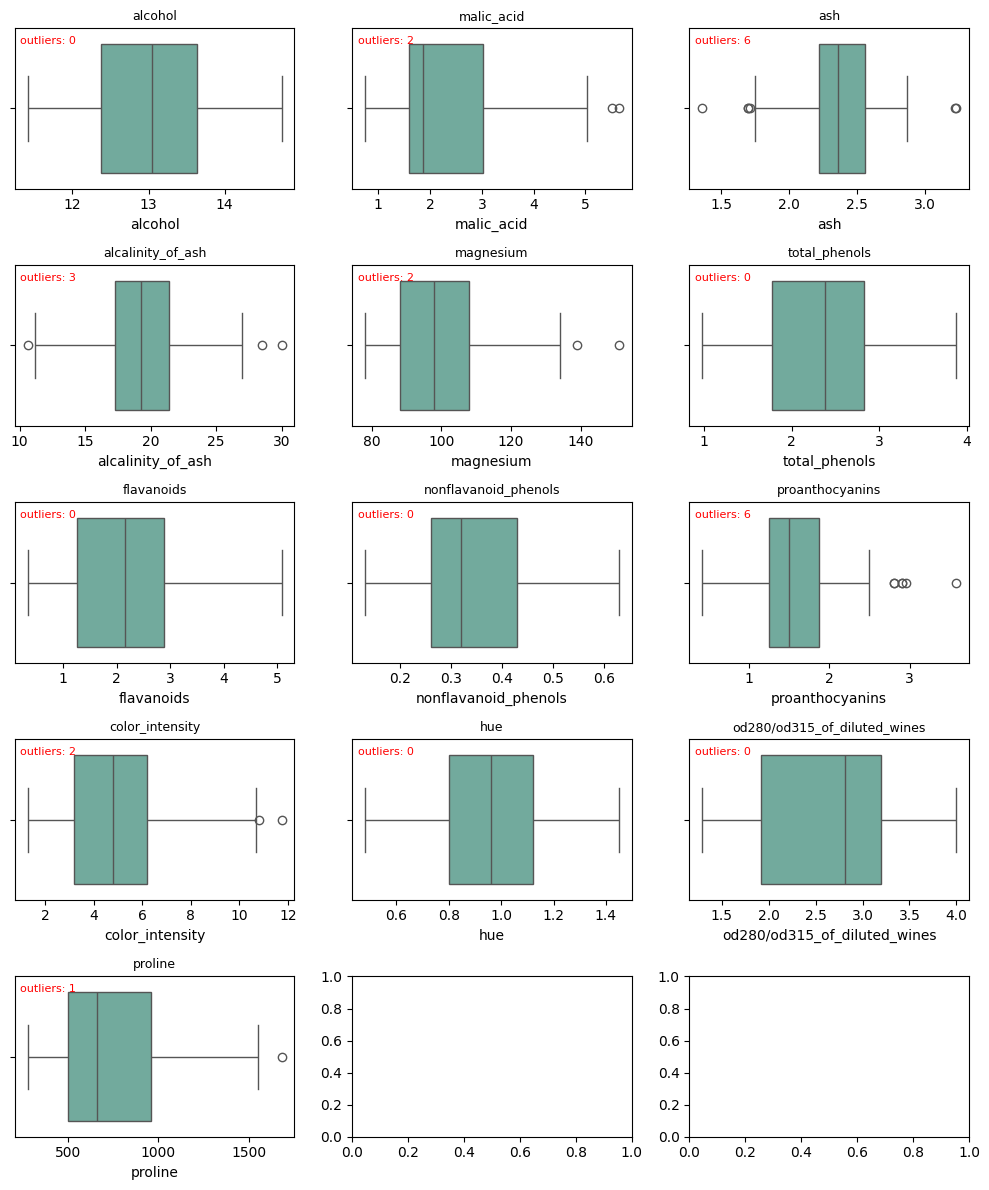

Univariate outlier counts:
 ash                             6
proanthocyanins                 6
alcalinity_of_ash               3
magnesium                       2
malic_acid                      2
color_intensity                 2
proline                         1
alcohol                         0
total_phenols                   0
nonflavanoid_phenols            0
flavanoids                      0
hue                             0
od280/od315_of_diluted_wines    0
dtype: int64


In [ ]:
##########################################################################################
# IQR box plot
##########################################################################################
"""
helps find outliers per feature

ash and proanthocyanins have the most
"""
outlier_counts = {}

fig, axes = plt.subplots(5, 3, figsize=(10, 12))        # 15 axes (13 used)
axes = axes.flatten()

for idx, col in enumerate(train_data.columns):
    ax = axes[idx]
    sns.boxplot(x=train_data[col], ax=ax, color="#69b3a2")
    ax.set_title(col, fontsize=9)
    # ── Tukey fences ────────────────────────────────────────────────────────────
    q1, q3 = np.percentile(train_data[col], [25, 75])
    iqr = q3 - q1
    lo, hi = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    n_out = ((train_data[col] < lo) | (train_data[col] > hi)).sum()
    outlier_counts[col] = n_out
    ax.annotate(f"outliers: {n_out}", xy=(0.02, 0.90), xycoords="axes fraction",
                fontsize=8, color="red", ha="left")

plt.tight_layout()
plt.show()

print("\nOutlier count dataframe:")
outlier_df = (pd.Series(outlier_counts).sort_values(ascending=False).reset_index().rename(columns={"index": "feature", 0: "n_outliers"}))
display(outlier_df)


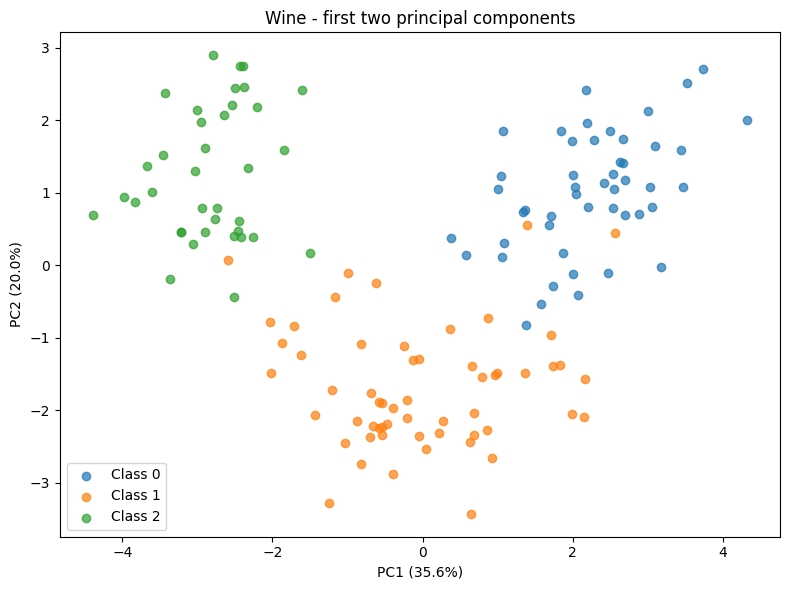

In [76]:

##########################################################################################
# PCA Scatterplot
##########################################################################################
'''
Used to gauge class separability

After seeing the pca scatter plot we can make some conclusions
The three classes are generally well clustered and seperated(with few outliers)
PC1 is at 35.60%
PC2 is at 20.00%
PC1 greatly separates classes 0 and 2
PC2 separates class 1 from classes 0 and 2
In total we get that PC1-2 account for 55.6% of the variation(remaining 44.40% being of PC3-13), which is not ideal
'''
train_data_scaled = SCALER.fit_transform(train_data)
pca = PCA(n_components=2, random_state=RANDOM)
pc = pca.fit_transform(train_data_scaled)

pc_df = pd.DataFrame(pc, columns=["PC1", "PC2"]).assign(target=train_labels)

fig, ax = plt.subplots(figsize=(8,6))
for cls in sorted(pc_df['target'].unique()):
    sel = pc_df['target'] == cls
    ax.scatter(pc_df.loc[sel, 'PC1'], pc_df.loc[sel, 'PC2'], label=f"Class {cls}", alpha=0.7)

ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.1%})")
ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.1%})")
ax.set_title("Wine - first two principal components")
ax.legend()
plt.tight_layout()
plt.show()





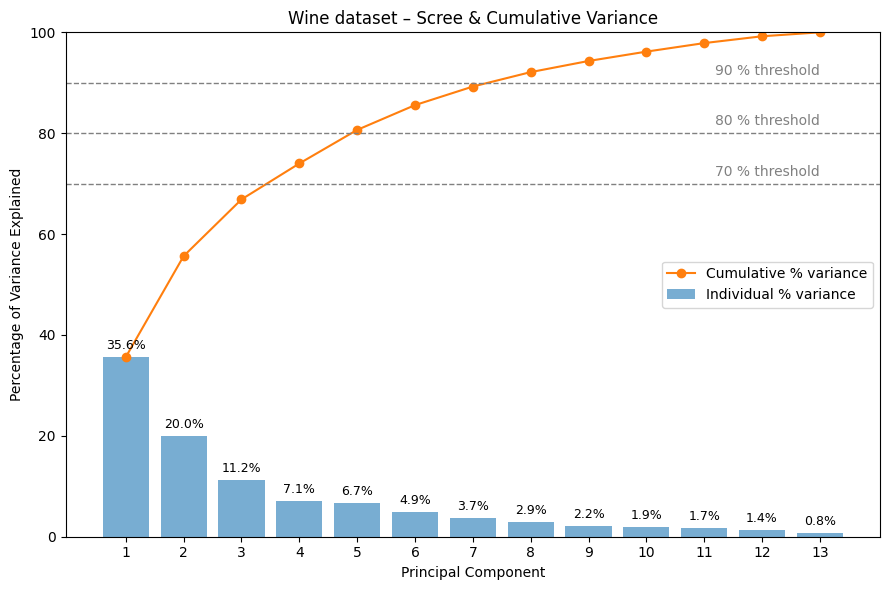

Number of PCs needed for ≥75 % variance: 5
Number of PCs needed for ≥80 % variance: 5
Number of PCs needed for ≥85 % variance: 6
Number of PCs needed for ≥90 % variance: 8


In [ ]:
##########################################################################################
# PCA Variance Plot
##########################################################################################
'''
helps choose dimensionality for Feature Engineering
I'll probably start with the top 8 PCs for 90% var for a baseline and compare to the full 13-feature model

Got a lot of PC's that fall under very low % values, dropping them can be benifical since they probably just add noise
Choosing number of PC's
Number of PCs needed for ≥75 % variance: 5
Number of PCs needed for ≥80 % variance: 5
Number of PCs needed for ≥85 % variance: 6
Number of PCs needed for ≥90 % variance: 8
'''
pca_full = PCA(random_state=RANDOM).fit(train_data_scaled)

# Collect variance information
var_pct  = pca_full.explained_variance_ratio_ * 100     # % variance per PC
cum_pct  = var_pct.cumsum()                             # cumulative %
pcs      = np.arange(1, len(var_pct) + 1)


fig, ax = plt.subplots(figsize=(9, 6))
bars = ax.bar(pcs, var_pct, alpha=0.6, label="Individual % variance")

for bar, pct in zip(bars, var_pct):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,                       # 1 % above the bar
        f"{pct:.1f}%",
        ha="center",
        va="bottom",
        fontsize=9
    )

ax.plot(pcs, cum_pct, marker="o", color="tab:orange", label="Cumulative % variance")

# Creates the variance threshold lines 
ax.axhline(90, ls="--", lw=1, color="gray")
ax.text(len(pcs), 91, "90 % threshold", ha="right", va="bottom", color="gray")
ax.axhline(80, ls="--", lw=1, color="gray")
ax.text(len(pcs), 81, "80 % threshold", ha="right", va="bottom", color="gray")
ax.axhline(70, ls="--", lw=1, color="gray")
ax.text(len(pcs), 71, "70 % threshold", ha="right", va="bottom", color="gray")

ax.set_xlabel("Principal Component")
ax.set_ylabel("Percentage of Variance Explained")
ax.set_title("Wine dataset – Scree & Cumulative Variance")
ax.set_xticks(pcs)
ax.set_ylim(0, max(var_pct.max() + 10, 100))
ax.legend()

plt.tight_layout()
plt.show()

# Help decide how many features to keep
n75 = np.argmax(cum_pct >= 75) + 1
print(f"Number of PCs needed for ≥75 % variance: {n75}")
n80 = np.argmax(cum_pct >= 80) + 1
print(f"Number of PCs needed for ≥80 % variance: {n80}")
n85 = np.argmax(cum_pct >= 85) + 1
print(f"Number of PCs needed for ≥85 % variance: {n85}")
n90 = np.argmax(cum_pct >= 90) + 1
print(f"Number of PCs needed for ≥90 % variance: {n90}")

## Part 3 - Experiments
You could add as many code cells as needed

In [ ]:
'''
This comment is about the process/results of this part
If you care to read them, it'll sum up what I've done. otherwise you could go over the code, there are comments there explaining the main ideas

From lecture 5:
    Data is limited (Cross validation)
    1) Run cross validation to estimate the test set performance
        - Training, validation, test folds
        - Optimize parameters in each iteration
    2) Run cross validation to estimate optimal parameters
        - Training, Validation folds only (also called Grid Search)
    3) Train on entire dataset using optimal set of parameters

Final Result:
    Macro-F1 score = 0.986
    Params   =  'clf': LogisticRegression(max_iter=2000, random_state=2025)
                'clf__C': 0.01
                'clf__penalty': 'l2'
                'pca__n_components': None, 0.9, 8           <-  They all got the same final score surprisingly
                                                                so we can either use 8 PC(I think it's the same for 0.9%), or just throw all data at the model

LEARNING ALGORITHMS USED(Atleast 2 classifiers, I used 5):
    -Logistic Regression - Learnt in class, same as linear regression, but uses a curve function, the curve with the highest value for the likelihood is selected
    -Random Forest Classifier - Basically uses decision trees, uses something called a bootstrapped dataset
                                bootstrapped dataset -  same size as the original dataset, we select examples randomly from the original, the same example can be selected
                                multiple times. that's how we build the bootstrapped dataset.
                                the bootstrapped dataset is used to create decision trees, each time a random number of features are selected

                                Once all is said and done, we run new examples through each tree in the random forest, and we keep track of all the classifications made
                                by all the trees. the label that is chosen the most times is our prediction(this process is called bagging)
                                All in all, I'd say it's a pretty cool concept.
    -SVM -  Learnt in a previous course(Datascience intro), basically uses math magic.
            basically creates a plane that trys to seperate our examples into different sides of it, each side representing a different classification
    -KNN -  Learnt in class, chooses classification according to who the neighbors are
    -Naive Bayes -      Learnt in class, usues probabilities to classify

HYPER PARAMETERS USED(Atleast 2 per classifier):
    -Logistic Regression -  C           -   inverse regularisation strength
                            Penalty     -   l2 for lbfgs, l1 for saga
                            multiclass  -    multinomial(lbfgs), ovr(saga)

    -Random Forest Classifies - n_estimators    -   Number of trees to be used in forest
                                max_depth       -   Limits depth of tree
    
    -SVM -  C       - penalty for misclassification
            gamma   - radius   

    -KNN -  n_neighbors - number of neighbors to take into account
            weights     - weight voting
            metric      - distance function

    -Naive Bayes - Has no actual hyperparms that I can change... but kept it because why not :)
'''

# Pipeline
pipe = Pipeline([
    ("scaler", SCALER),
    ("pca",    PCA(random_state=RANDOM)),
    ("clf",    LogisticRegression(random_state=RANDOM))    # the real classifier is later defined in the param_grid, this is a placeholder
])

# Define search space
# param grid is a list of dicts 
# each dict specifies a specific classification model, and it's possible hyper parameters
param_grid = [
    # Logistic Regression using l2 with 1bfgs solver
    {
        "pca__n_components": [None, 5, 8, 0.90],    # 0.9 - keep as many PCs for over 90% variance
                                                    # None - skips PCA, lets model see all 13 features
                                                    # 5,8 - at 5 we get 80%, at 8 we pass the 90% var(As seen in the graph above)
        "clf":               [LogisticRegression(max_iter=2000, solver="lbfgs", penalty="l2", random_state=RANDOM)],  # replace pipeline's placeholder
        "clf__C":            [0.01, 0.1, 1, 10],    # The inverse of lambda, small -> large Lambda -> model keeps weights small(more overfit, better generalization)
                                                    #                        large -> small Lambda -> higher chance of overfit
    },
    # Logistic Regression using l1 with saga solver -> This was pointless L2 worked much better
    # explaination same as for the previous LR
    {
        "pca__n_components": [None, 5, 8, 0.90],
        "clf":               [LogisticRegression(max_iter=10000,solver="saga", penalty ="l1", random_state=RANDOM)],
        "clf__C":            [0.01, 0.1, 1, 10],
    },
    # Random Forest
    {
        "pca__n_components": [None, 5, 8, 0.90],
        "clf":               [RandomForestClassifier(n_jobs=-1,random_state=RANDOM)],   # n_jobs=-1 to use all core, no gpu support :)
        "clf__n_estimators": [10, 100, 200, 500, 1000], # number of trees in the forest
                                                        # more trees means lower variance but more compute time
        "clf__max_depth":    [None, 5, 10, 20, 40]  # max depth for trees
                                                    # None means it doesn't limit the depth, else use the predefined values
    },
    # SVM
    {
        "pca__n_components": [None, 5, 8, 0.90],
        "clf":               [SVC(probability=True, random_state=RANDOM)],  # enable probability=True for F1 scoring
        "clf__C":            [0.1, 1, 10],
        "clf__gamma":        ['scale', 0.01, 0.1]  # kernel coefficient, affects decision boundary smoothness
    },
    # KNN
    {
        "pca__n_components": [None, 5, 8, 0.90],
        "clf":               [KNeighborsClassifier()],
        "clf__n_neighbors":  [3, 5, 7, 9, 11],
        "clf__weights":      ['uniform', 'distance'],  # weight neighbors by distance or not
        "clf__metric":       ['euclidean', 'manhattan']
    },
    # Naive Bayes
    {
        "pca__n_components": [None, 5, 8, 0.90],
        "clf":               [GaussianNB()]
    }
]

# averages F1 per class and then averages them,
# weighting classes equally which is what rubric demands for multi-class classification.
macro_f1 = make_scorer(f1_score, average="macro")

# 5-fold cross validation
# grid search
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM)


'''
creates 5 internal folds
in every iteration: 
    - fits the pipeline on 4 folds 
    - evaluates macro f1 on the hold out fold
    - repeats on all folds and averages the scores...

scoring = macro_f1  -   Compute F1 separately for each class (1-vs-all), 
                        then take the unweighted arithmetic mean. 
                        Every class gets equal influence, no matter how many samples it has.
'''
grid = GridSearchCV(
    estimator=pipe,                 # read above about the piple
    param_grid=param_grid,          # read above about the param grid
    scoring=macro_f1,               # macro average f1
    cv=cv,                          # cross validation number of folds
    n_jobs=-1,                      # -1 lets it run on all cpu core, we don't have gpu support, takes longer :)
    refit=True,                     # after search, fit best pipe on full train
    return_train_score=True,        # Didn't quite understand how it works but it returns the mean test and train scores
)
grid.fit(train_data, train_labels)

# Summary of the results
cv_results_df = pd.DataFrame(grid.cv_results_)
sorted_df = cv_results_df.sort_values(by="mean_test_score", ascending=False)    # higher mean test score the better, so we sort by decreasing order
results_df = sorted_df[["params", "mean_test_score", "std_test_score"]]

# some formatting to get a better display of the df, gpt's suggestion since i had an issues with cell width being too small
pd.set_option("display.max_colwidth", None)     # show entire cell contents
pd.set_option("display.width", None)            # let Jupyter decide total width

print("\nTop permutations(sorted by mean macro-F1 over 5 folds):")
display(results_df.head(10))

print("\nBEST permutation:")
print(f"Macro-F1 = {grid.best_score_:.3f}")
print(f"Params   = {grid.best_params_}")

# Save results for later
BEST_MODEL = grid.best_estimator_
BEST_PCA    = BEST_MODEL.named_steps["pca"]
BEST_CLF    = BEST_MODEL.named_steps["clf"]


Top permutations(sorted by mean macro-F1 over 5 folds):


,params,mean_test_score,std_test_score
0,"{'clf': LogisticRegression(max_iter=2000, random_state=2025), 'clf__C': 0.01, 'pca__n_components': None}",0.986308,0.016843
2,"{'clf': LogisticRegression(max_iter=2000, random_state=2025), 'clf__C': 0.01, 'pca__n_components': 8}",0.986308,0.016843
3,"{'clf': LogisticRegression(max_iter=2000, random_state=2025), 'clf__C': 0.01, 'pca__n_components': 0.9}",0.986308,0.016843
151,"{'clf': SVC(probability=True, random_state=2025), 'clf__C': 1, 'clf__gamma': 0.01, 'pca__n_components': 0.9}",0.986308,0.016843
150,"{'clf': SVC(probability=True, random_state=2025), 'clf__C': 1, 'clf__gamma': 0.01, 'pca__n_components': 8}",0.986308,0.016843
248,"{'clf': GaussianNB(), 'pca__n_components': None}",0.985837,0.017366
148,"{'clf': SVC(probability=True, random_state=2025), 'clf__C': 1, 'clf__gamma': 0.01, 'pca__n_components': None}",0.985314,0.017987
239,"{'clf': KNeighborsClassifier(), 'clf__metric': 'manhattan', 'clf__n_neighbors': 9, 'clf__weights': 'distance', 'pca__n_components': 0.9}",0.979971,0.027131
238,"{'clf': KNeighborsClassifier(), 'clf__metric': 'manhattan', 'clf__n_neighbors': 9, 'clf__weights': 'distance', 'pca__n_components': 8}",0.979971,0.027131
234,"{'clf': KNeighborsClassifier(), 'clf__metric': 'manhattan', 'clf__n_neighbors': 9, 'clf__weights': 'uniform', 'pca__n_components': 8}",0.979971,0.027131



BEST permutation:
Macro-F1 = 0.986
Params   = {'clf': LogisticRegression(max_iter=2000, random_state=2025), 'clf__C': 0.01, 'pca__n_components': None}


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

## Part 5 - Apply on test and show model performance estimation